In [1]:
import qiskit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

░      ┌───┐ ░    ┌─┐ ░                         
Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────
   ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                         
A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────
   └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐┌──────────┐
B: ─────┤ X ├─░────────────░──╫──╫──░─┤0         ├┤0         ├
        └───┘ ░            ░  ║  ║  ░ │  If_else ││          │
a: ═══════════════════════════╩══╬════╡0         ╞╡          ╞
                                 ║    └──────────┘│          │
b: ══════════════════════════════╩════════════════╡0         ╞
                                                  └──────────┘

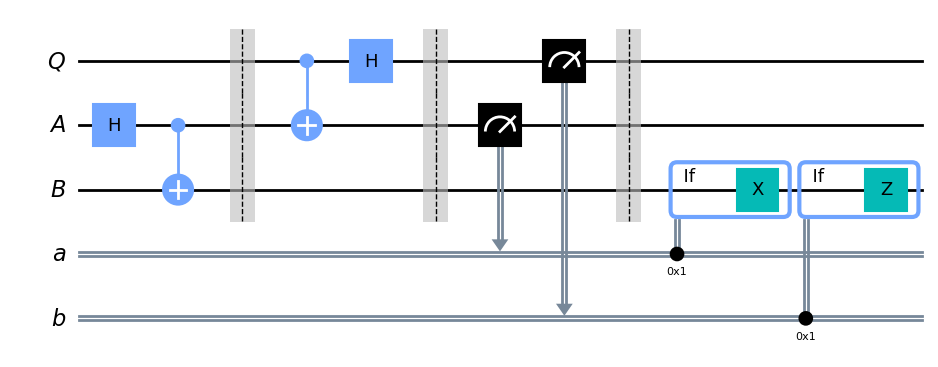

In [3]:
protocol.draw(output='mpl')

In [7]:
print(protocol.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Q} :  } & \lstick{{Q} :  } & \qw & \qw \barrier[0em]{2} & \qw & \ctrl{1} & \gate{\mathrm{H}} \barrier[0em]{2} & \qw & \qw & \meter \barrier[0em]{2} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{A} :  } & \lstick{{A} :  } & \gate{\mathrm{H}} & \ctrl{1} & \qw & \targ & \qw & \qw & \meter & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{B} :  } & \lstick{{B} :  } & \qw & \targ & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \multigate{1}{\mathrm{If_else}}_<<<{0} & \multigate{2}{\mathrm{If_else}}_<<<{0} & \qw & \qw\\
	 	\nghost{{a} :  } & \lstick{{a} :  } & \cw & \cw & \cw & \cw & \cw & \cw & \cw \ar @{<=} [-2,0] & \cw & \cw & \cghost{\mathrm{If_else}}_<<<{0} & \cghost{\mathrm{If_else}} & \cw & \cw\\
	 	\nghost{{b} :  } & \lstick{{b} :  } & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw \ar @{<=} [-4,0] & \cw & \cw & \c